In [1]:
import sys
sys.path.append("..")
from webapp.utils.azure_utils import KeyVault, DataLake
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt

c:\Users\nmert\OneDrive\Data Science\OMSA\HW & Projects\omsa_dva_project\.venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\nmert\OneDrive\Data Science\OMSA\HW & Projects\omsa_dva_project\.venv\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\nmert\OneDrive\Data Science\OMSA\HW & Projects\omsa_dva_project\.venv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Connect to Storage Account:
vault = KeyVault(keyVaultName = "keyvaultdva2022")
storage_credential = vault.get_secret(secretName = "storagePrimaryKey")
storage = DataLake(account_name = "storageaccountdva", credential = storage_credential)
file_system = "energyhub"

In [3]:
files = storage.list_directory_contents(file_system, directory = "forecasting/results")

In [4]:
dfs = []

for file in files:
    df = storage.pandas_read(file_system, directory="/", file_name=file)
    dfs.append(df)

df = pd.concat(dfs)

In [6]:
buildings = df.building_id.unique()

In [31]:
results = {}
for building_id in buildings:
    building = df[df.building_id == building_id]
    scaler = StandardScaler()
    val = scaler.fit_transform(building[["electricity", "predictions"]])
    rmse = np.mean((val[:, 0] - val[:, 1])**2)

    results[building_id] = rmse

In [54]:
np.mean(list(results.values()))

1.8411216511250978

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


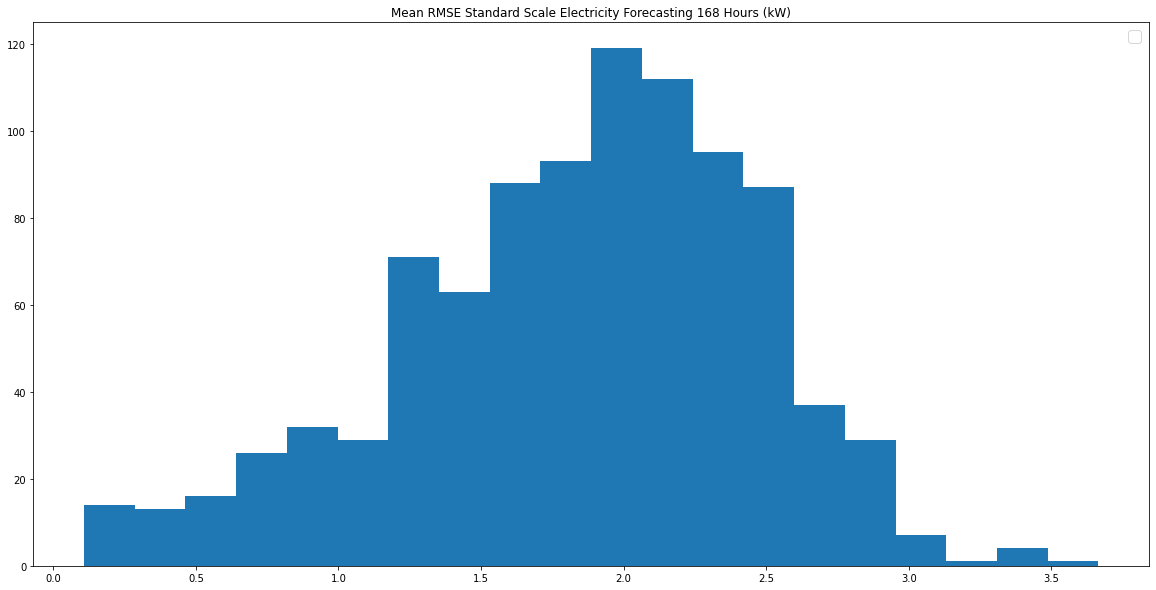

In [50]:
legend_properties = {'weight':'bold','size':'16'}
fig, ax = plt.subplots(figsize = (20,10))
ax.hist(list(results.values()), bins = 20);
ax.set_title("Mean RMSE Standard Scale Electricity Forecasting 168 Hours (kW)") 
ax.legend(loc = 0, prop = legend_properties)
plt.show()